# Notebook 01: Descarga de Datos

## Objetivo
Descargar datos historicos del precio del cobre desde Yahoo Finance y guardarlos en formato CSV.

## Fuente de Datos
- **Ticker:** HG=F (Copper Futures)
- **Periodo:** 2010-01-01 hasta hoy
- **Fuente:** Yahoo Finance via yfinance

## Pasos
1. Importar librerias necesarias
2. Descargar datos usando el modulo data_loader
3. Explorar datos basicos (head, info, describe)
4. Verificar missing values
5. Guardar en data/raw/


## 1. Importar Librerias

In [3]:
import sys
import os

# Agregar path del proyecto
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importar modulos del proyecto
from src.data_loader import download_and_load, get_data_summary, validate_data

# Configuracion de visualizacion
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

print("Librerias importadas correctamente")

Librerias importadas correctamente


## 2. Descargar Datos desde Yahoo Finance

La funcion `download_and_load()` descarga los datos si no existen, o los carga si ya fueron descargados previamente.

In [4]:
# Descargar o cargar datos
df = download_and_load(config_path='../config.yaml', force_download=False)

print(f"\nDataFrame cargado con {len(df)} registros")
print(f"Rango de fechas: {df['fecha'].min()} a {df['fecha'].max()}")

Archivo no encontrado. Descargando datos...
Descargando datos de HG=F desde 2010-01-01...


/workspaces/codespaces-jupyter/predictor-precio-cobre/notebooks/../src/data_loader.py:61: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)


Descarga exitosa: 3962 registros desde 2010-01-04 00:00:00 hasta 2025-10-02 00:00:00
Datos guardados en: data/raw/precio_cobre_yahoo.csv

DataFrame cargado con 3962 registros
Rango de fechas: 2010-01-04 00:00:00 a 2025-10-02 00:00:00


## 3. Exploracion Basica de Datos

In [5]:
# Primeras 10 filas
print("Primeras 10 filas:")
df.head(10)

Primeras 10 filas:


,fecha,precio_cobre_usd_lb
0,2010-01-04,3.3880
1,2010-01-05,3.3960
2,2010-01-06,3.4775
3,2010-01-07,3.4115
4,2010-01-08,3.3880
5,2010-01-11,3.4285
6,2010-01-12,3.3375
7,2010-01-13,3.3875
8,2010-01-14,3.3760
9,2010-01-15,3.3550


In [6]:
# Ultimas 10 filas
print("Ultimas 10 filas:")
df.tail(10)

Ultimas 10 filas:


,fecha,precio_cobre_usd_lb
3952,2025-09-19,4.5690
3953,2025-09-22,4.5730
3954,2025-09-23,4.5845
3955,2025-09-24,4.7525
3956,2025-09-25,4.7000
3957,2025-09-26,4.7155
3958,2025-09-29,4.8410
3959,2025-09-30,4.8050
3960,2025-10-01,4.8305
3961,2025-10-02,4.8980


In [7]:
# Informacion del DataFrame
print("Informacion del DataFrame:")
df.info()

Informacion del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3962 entries, 0 to 3961
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   fecha                3962 non-null   datetime64[ns]
 1   precio_cobre_usd_lb  3962 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 62.0 KB


In [8]:
# Estadisticas descriptivas
print("Estadisticas descriptivas:")
df.describe()

Estadisticas descriptivas:


,fecha,precio_cobre_usd_lb
count,3962,3962.000000
mean,2017-11-17 14:33:44.432105216,3.386041
min,2010-01-04 00:00:00,1.939500
25%,2013-12-09 06:00:00,2.777125
50%,2017-11-15 12:00:00,3.312750
75%,2021-10-25 18:00:00,3.962750
max,2025-10-02 00:00:00,5.795000
std,NaN,0.741137


## 4. Verificar Missing Values

In [9]:
# Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())
print(f"\nTotal de valores nulos: {df.isnull().sum().sum()}")

# Porcentaje de valores nulos
if len(df) > 0:
    porcentaje_nulos = (df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100
    print(f"Porcentaje de valores nulos: {porcentaje_nulos:.2f}%")

Valores nulos por columna:
fecha                  0
precio_cobre_usd_lb    0
dtype: int64

Total de valores nulos: 0
Porcentaje de valores nulos: 0.00%


## 5. Resumen de Datos

In [10]:
# Obtener resumen completo
summary = get_data_summary(df)

print("Resumen de datos del cobre:")
print("="*50)
for key, value in summary.items():
    print(f"{key:20s}: {value}")
print("="*50)

Resumen de datos del cobre:
num_registros       : 3962
fecha_inicio        : 2010-01-04 00:00:00
fecha_fin           : 2025-10-02 00:00:00
precio_promedio     : 3.386040633733317
precio_mediana      : 3.312749981880188
precio_min          : 1.9394999742507935
precio_max          : 5.795000076293945
precio_std          : 0.7411369247008592
valores_nulos       : 0


## 6. Validacion de Datos

In [11]:
# Validar datos
es_valido, errores = validate_data(df)

if es_valido:
    print("Los datos son validos y estan listos para usar")
else:
    print("ADVERTENCIA: Los datos tienen los siguientes problemas:")
    for error in errores:
        print(f"  - {error}")

Los datos son validos y estan listos para usar


## 7. Visualizacion Rapida

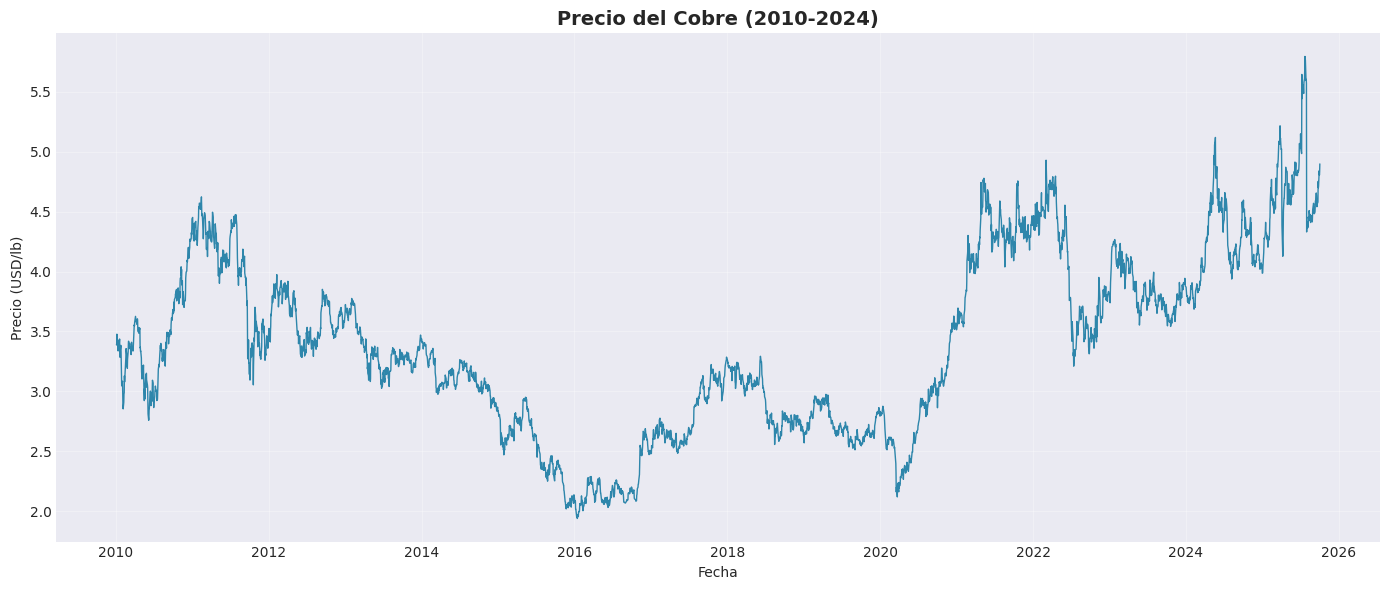

In [12]:
# Grafico simple de la serie temporal
plt.figure(figsize=(14, 6))
plt.plot(df['fecha'], df['precio_cobre_usd_lb'], linewidth=1, color='#2E86AB')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD/lb)')
plt.title('Precio del Cobre (2010-2024)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 8. Conclusiones

En este notebook:
1. Descargamos exitosamente los datos del precio del cobre desde Yahoo Finance
2. Verificamos que los datos no tienen valores nulos
3. Confirmamos que las fechas estan ordenadas cronologicamente
4. Validamos que los precios son positivos
5. Visualizamos la serie temporal completa

**Datos guardados en:** `data/raw/precio_cobre_yahoo.csv`

**Proximo paso:** Notebook 02 - Analisis Exploratorio de Datos (EDA)